In [389]:
import matplotlib as mpl
import pandas as pd
from pandas.plotting import scatter_matrix
import xgboost as xgb

#Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTGD - Home team goal at the end of the game
#ATGD - away team goal at the end of the game

raw_data_1 = pd.read_csv('./season-1819.csv')

columns_req = ['FTHG','FTAG','FTR']
columns_req1 = ['HomeTeam','AwayTeam']
dataTeams = raw_data_1[columns_req1]
data = raw_data_1[columns_req]
data[0:20]

,FTHG,FTAG,FTR
0,3,1,H
1,1,2,A
2,0,2,A
3,1,0,H
4,2,0,H
5,1,1,D
6,2,1,H
7,4,1,H
8,1,0,H
9,0,0,D


Es sind  81 gespielt worden
Es sind  2 Features im Datensatz
Die Heimmannschaft hat  35 mal gewonnen
Die Auswärtsmannschaft hat  24 mal gewonnen
Es gab  22  Unentschieden
Die Heimmannschaft gewinnt zu  43.20987654320987 %
Die Auswärtsmannschaft gewinnt zu  29.629629629629626 %
Die Wahrscheinlichkeit für ein Unentschieden war  27.160493827160494 %


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f725dc62128>,
      dtype=object)

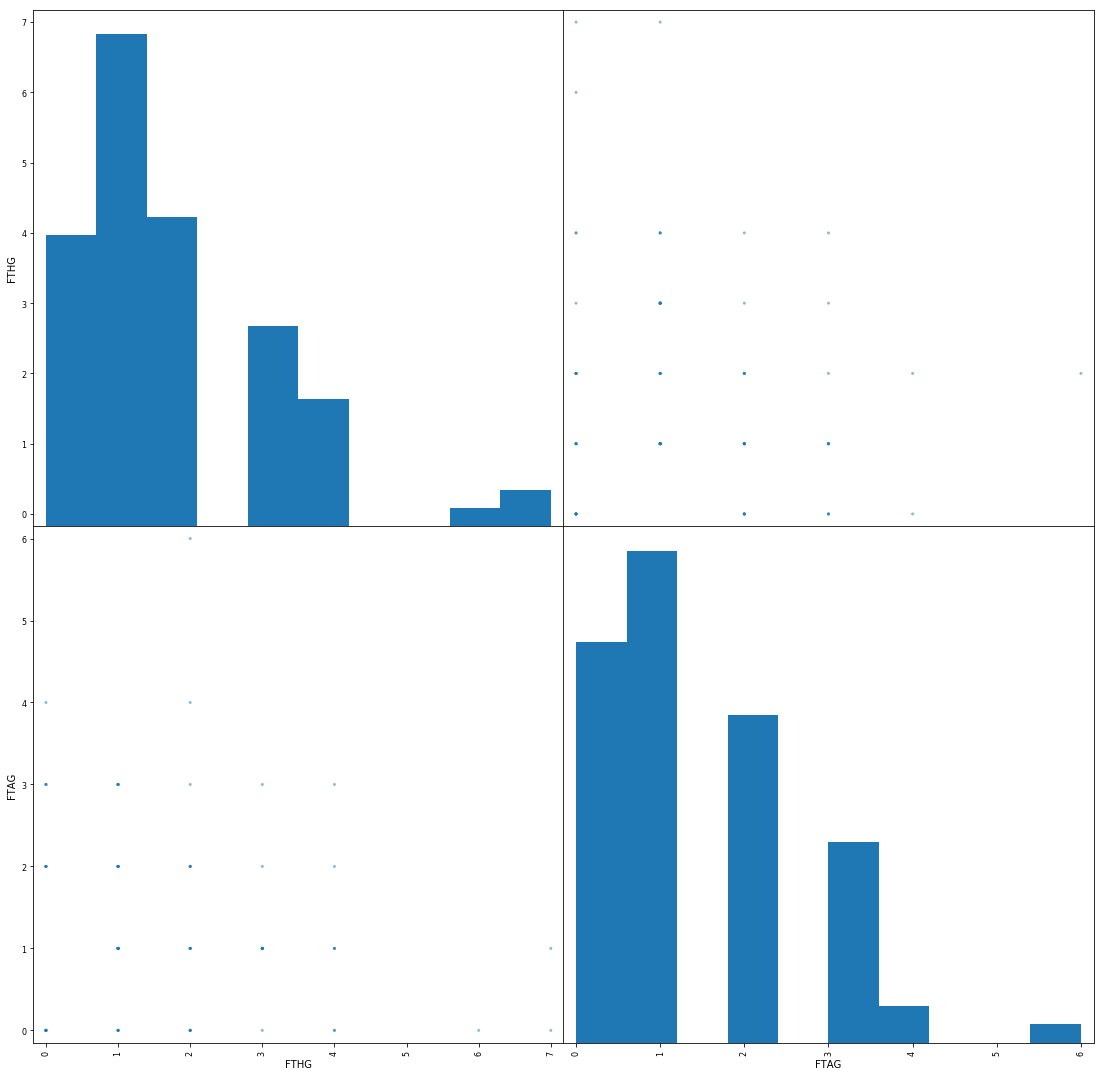

In [388]:
#Anzahl der Spiele
n_matches = data.shape[0]
n_features = data.shape[1]-1
n_homewins = len(data[data.FTR == 'H'])
n_awaywins = len(data[data.FTR == 'A'])
n_draw = len(data[data.FTR == 'D'])
win_rate_home = ((n_homewins) / (n_matches)) * 100
win_rate_away = ((n_awaywins) / (n_matches)) * 100
draw_rate = ((n_draw) / (n_matches)) * 100


print("Es sind ", n_matches, "gespielt worden")
print("Es sind ", n_features, "Features im Datensatz")
print("Die Heimmannschaft hat ",n_homewins, "mal gewonnen")
print("Die Auswärtsmannschaft hat ",n_awaywins, "mal gewonnen")
print("Es gab ",n_draw, " Unentschieden")
print("Die Heimmannschaft gewinnt zu ",win_rate_home, "%")
print("Die Auswärtsmannschaft gewinnt zu ",win_rate_away, "%")
print("Die Wahrscheinlichkeit für ein Unentschieden war ",draw_rate, "%")
scatter_matrix(data[['FTHG','FTAG']], figsize=(19,19))

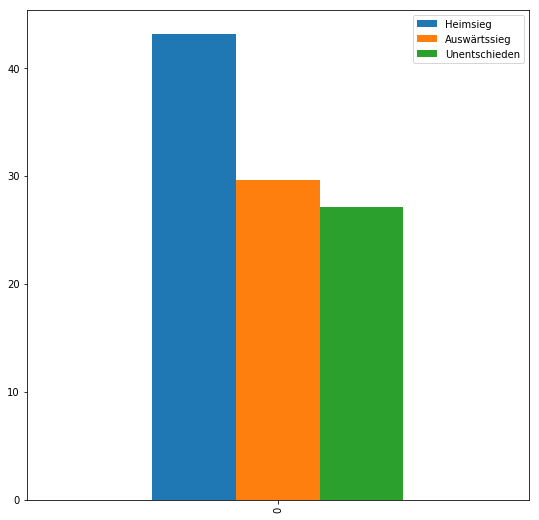

In [387]:
d = {'Heimsieg': [win_rate_home], 'Auswärtssieg': [win_rate_away], 'Unentschieden': [draw_rate]}
df = pd.DataFrame(data=d)
df.plot.bar(figsize=(9,9));

/home/lennard/PycharmProjects/MachineLearning/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


,FTHG,FTAG
0,0.811880,-0.298383
1,-0.490344,0.535032
2,-1.141455,0.535032
3,-0.490344,-1.131797
4,0.160768,-1.131797


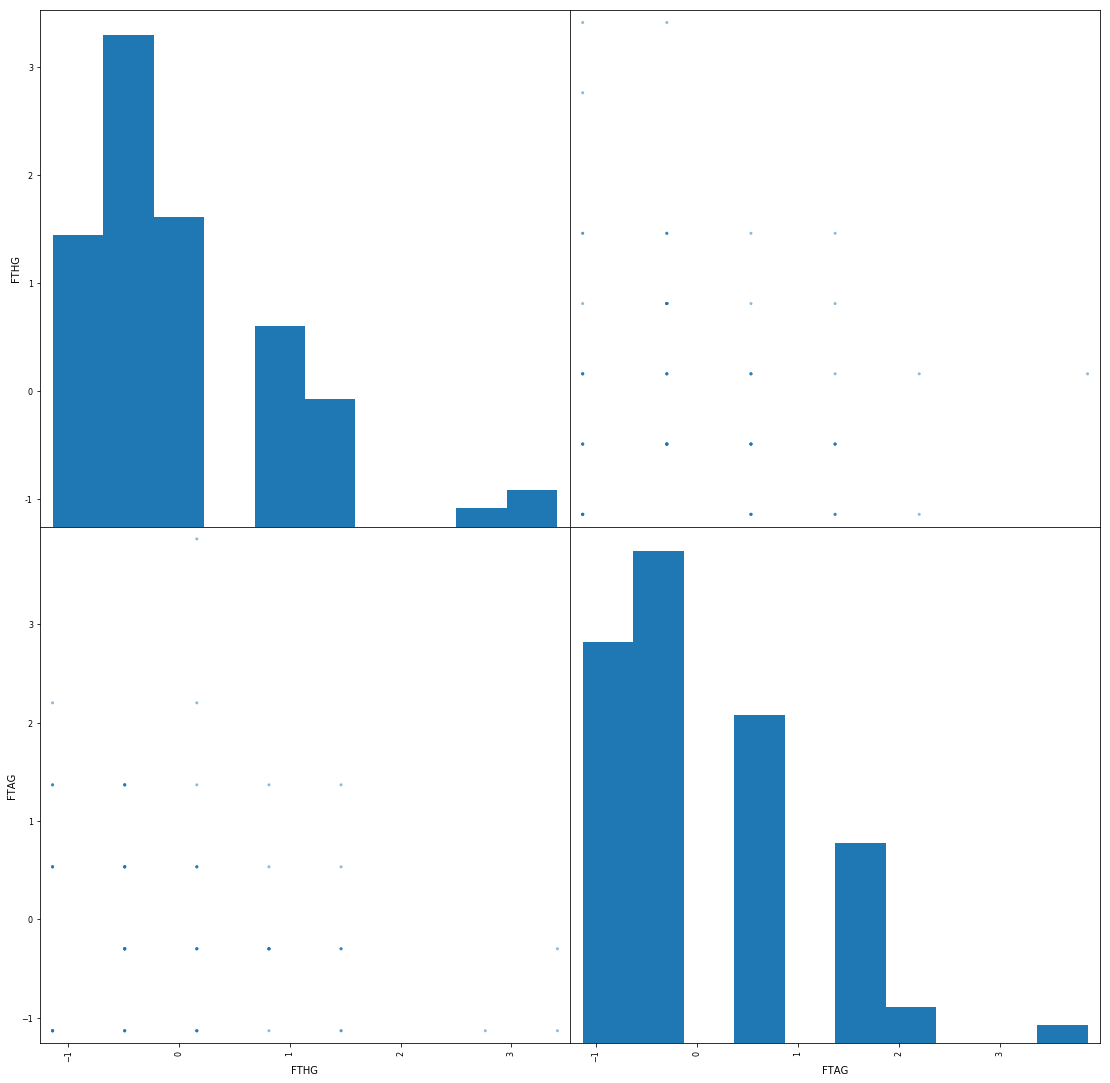

In [429]:
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['FTHG','FTAG']]
for col in cols:
    X_all[col] = scale(X_all[col])
scatter_matrix(X_all[['FTHG','FTAG']], figsize=(19,19))
X_all[0:5]

In [430]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 40,
                                                    random_state = 2,
                                                    stratify = y_all)

In [431]:
def train_classifier(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
def predict_labels(clf, spiel):
    spiel1 = spiel - 1
    y_pred1 = clf.predict(X_all[spiel1:spiel])
    if (y_pred1 == ['H']):
        ergebnis = "Heimsieg"
    elif (y_pred1 == ['H']):
        ergebnis = "Auswärtssieg"
    else:
        ergebnis = "Unentschieden"
    print("Die Prediciton für das Spiel",dataTeams.at[spiel1 ,'HomeTeam'] ,"gegen ", dataTeams.at[spiel1 ,'AwayTeam'], " Spiel ist ",ergebnis)
    return y_pred1
    
def train_predict(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    return predict_labels(clf, 17)
 

In [432]:
clf_C = xgb.XGBClassifier(seed = 1000)

In [433]:
print(train_predict(clf_C, X_train, y_train, X_test, y_test))

Die Prediciton für das Spiel RB Leipzig gegen  Fortuna Dusseldorf  Spiel ist  Unentschieden
['D']


In [434]:
counter = 0
for i in range(1,82):
    test = data.at[i-1,'FTR'] == predict_labels(clf_C, i)
    
    if(test == False):
        counter += 1
        if (data.at[i-1,'FTR'] == "H"):
            ergebnis = "Heimsieg"
        elif (data.at[i-1,'FTR'] == "A"):
            ergebnis = "Auswärtssieg"
        else:
            ergebnis = "Unentschieden"
        print()
        print ("und das ist FALSCH. Der Richtige Wert wäre ", ergebnis)
        print()

Die Prediciton für das Spiel Bayern Munich gegen  Hoffenheim  Spiel ist  Heimsieg
Die Prediciton für das Spiel Fortuna Dusseldorf gegen  Augsburg  Spiel ist  Unentschieden
Die Prediciton für das Spiel Freiburg gegen  Ein Frankfurt  Spiel ist  Unentschieden
Die Prediciton für das Spiel Hertha gegen  Nurnberg  Spiel ist  Heimsieg
Die Prediciton für das Spiel M'gladbach gegen  Leverkusen  Spiel ist  Heimsieg
Die Prediciton für das Spiel Werder Bremen gegen  Hannover  Spiel ist  Unentschieden
Die Prediciton für das Spiel Wolfsburg gegen  Schalke 04  Spiel ist  Heimsieg
Die Prediciton für das Spiel Dortmund gegen  RB Leipzig  Spiel ist  Heimsieg
Die Prediciton für das Spiel Mainz gegen  Stuttgart  Spiel ist  Heimsieg
Die Prediciton für das Spiel Hannover gegen  Dortmund  Spiel ist  Unentschieden
Die Prediciton für das Spiel Augsburg gegen  M'gladbach  Spiel ist  Unentschieden
Die Prediciton für das Spiel Ein Frankfurt gegen  Werder Bremen  Spiel ist  Unentschieden
Die Prediciton für das Spi

In [435]:
print("Die Prediciton liegt zu ", 100-(((counter) / (n_matches)) * 100), "Prozent richtig!!!!")

Die Prediciton liegt zu  98.76543209876543 Prozent richtig!!!!
